# Initialization

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as qubit
import scqubits.utils.plotting as plot

import numpy as np

# Transmon qubit

The transmon qubit and the Cooper pair box are described by the Hamiltonian 
\begin{equation}
H_\text{CPB}=4E_\text{C}(\hat{n}-n_g)^2+\frac{1}{2}E_\text{J}\sum_n(|n\rangle\langle n+1|+\text{h.c.}),
\end{equation}
expressed in the charge basis. Here,  $E_C$ is the charging energy, $E_J$ the Josephson energy, and $n_g$ the offset charge. Internal representation of the Hamiltonian proceeds via the charge basis with charge-number cutoff specified by `ncut`, which must be chosen sufficiently large for convergence.

An instance of the transmon qubit is initialized as follows:

In [3]:
CPB = qubit.Transmon(
    EJ=30.02,
    EC=1.2,
    ng=0.3,
    ncut=31
    )

The energy eigenvalues of the transmon Hamiltonian for the given set of model parameters are obtained by calling the `eigenvals()` method. The optional parameter `evals_count` specifies the sought number of eigenenergies.

In [3]:
CPB.eigenvals(evals_count=12)

array([-21.84381856,  -6.17518551,   8.01366695,  20.04897106,
        30.54312385,  38.7071573 ,  54.55482909,  67.49323244,
        90.05182723, 107.1140667 , 135.67852225, 156.68219246])

To plot eigenenergies as a function of one of the qubit parameters (`EJ`, `EC`, or `ng`), we generate an array of values for the desired parameter and call the method `plot_evals_vs_paramvals`:

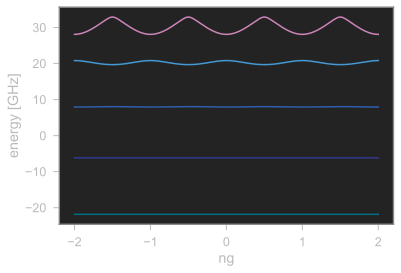

In [4]:
ng_list = np.linspace(-2, 2, 220)
CPB.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False);

In [9]:
ng_list = np.linspace(-2, 2, 220)
# NOTE: for this to work the directory "./data" needs to exist already.
tst = CPB.get_spectrum_vs_paramvals('ng', ng_list, evals_count=4, subtract_ground=False, get_eigenstates=True, filename='./data/spectrum_vs_ng');

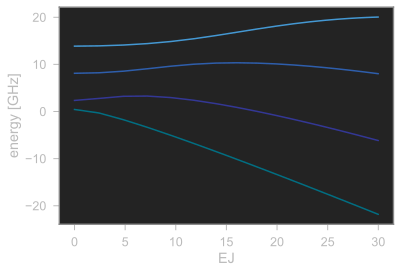

In [6]:
CPB.ng = 0.3
ej_vals = CPB.EJ * np.cos(np.linspace(-np.pi/2, np.pi/2, 40))
CPB.plot_evals_vs_paramvals('EJ', ej_vals, evals_count=4, subtract_ground=False);

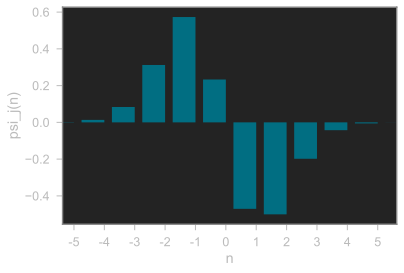

In [7]:
CPB.plot_n_wavefunction(esys=None, which=1, mode='real');

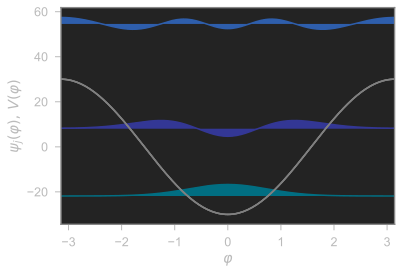

In [4]:
CPB.plot_phi_wavefunction(esys=None, which=[0,2,6], mode='real');

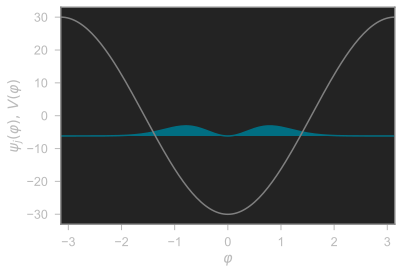

In [5]:
CPB.plot_phi_wavefunction(esys=None, which=1, mode='abs_sqr');

### Charge matrix elements

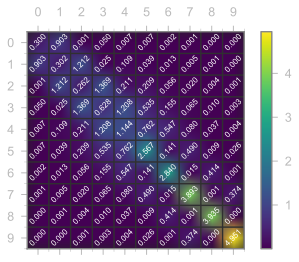

In [6]:
CPB.EJ  = 30
CPB.ncut = 80
nmat = CPB.matrixelement_table('n_operator', evals_count=10)
plot.print_matrix(abs(nmat));

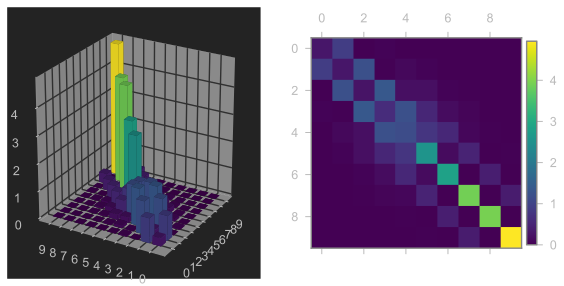

In [7]:
CPB.plot_matrixelements('n_operator', evals_count=10);

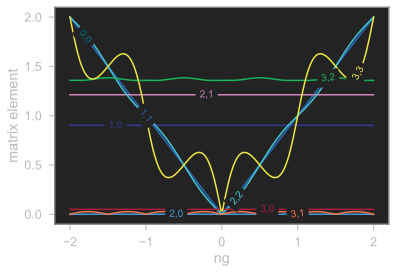

In [10]:
fig, ax = CPB.plot_matelem_vs_paramvals('n_operator', 'ng', ng_list, select_elems=4, filename='./data/test');

In [3]:
tst = np.asarray([1.0,2.0])
np.conj(tst)

array([1., 2.])